In [1]:
import pandas as pd

# Reads the uploaded Weather Data file
df = pd.read_csv("WeatherData_Q4.csv")

# Preview the data
display(df.head())


,temp,humid,rain
0,0.15,0.20,0
1,0.18,0.15,0
2,0.22,0.25,0
3,0.25,0.18,0
4,0.30,0.28,0


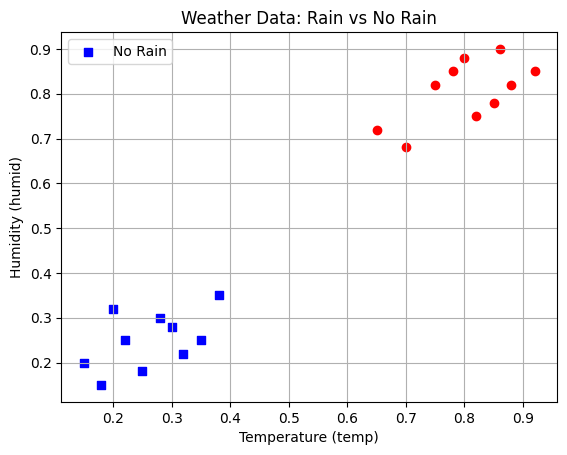

In [2]:
import matplotlib.pyplot as plt

# Extract features and labels
x1 = df['temp']  # temperature
x2 = df['humid']  # humidity
y = df['rain']    # rain (0 or 1)

# Plotting the data points
for i in range(len(df)):
    if y[i] == 0:
        plt.scatter(x1[i], x2[i], color='blue', marker='s', label='No Rain' if i == 0 else "")
    else:
        plt.scatter(x1[i], x2[i], color='red', marker='o', label='Rain' if i == 0 else "")

plt.xlabel("Temperature (temp)")
plt.ylabel("Humidity (humid)")
plt.title("Weather Data: Rain vs No Rain")
plt.legend()
plt.grid(True)
plt.show()

In [3]:
import numpy as np

# Convert dataframe to numpy array
dataset = df[['temp', 'humid', 'rain']].values

# Split into training (first 15) and testing (last 5)
train = dataset[:15]
test = dataset[15:]

# Initialize weights and bias
np.random.seed(42)
weights = np.random.uniform(-0.5, 0.5, size=2)
bias = np.random.uniform(-0.5, 0.5)
learning_rate = 0.1
max_epochs = 1000

# Activation function
def step(z):
    return 1 if z >= 0 else 0

# Training loop
for epoch in range(max_epochs):
    errors = 0
    for sample in train:
        x = sample[:2]  # features: temp, humid
        target = int(sample[2])  # label: rain
        z = np.dot(weights, x) + bias
        prediction = step(z)
        error = target - prediction

        # Update weights and bias
        weights += learning_rate * error * x
        bias += learning_rate * error
        errors += int(error != 0)

    if errors == 0:
        break  # Early stop if no errors

print(f"Training complete after {epoch+1} epochs")
print("Final weights:", weights)
print("Final bias:", bias)


Training complete after 4 epochs
Final weights: [-0.10245988  0.45371431]
Final bias: -0.16800605818859493


In [4]:
def evaluate(data, weights, bias):
    correct = 0
    for sample in data:
        x = sample[:2]
        target = int(sample[2])
        prediction = step(np.dot(weights, x) + bias)
        if prediction == target:
            correct += 1
    return correct / len(data)

train_acc = evaluate(train, weights, bias)
test_acc = evaluate(test, weights, bias)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)


Training Accuracy: 1.0
Testing Accuracy: 1.0


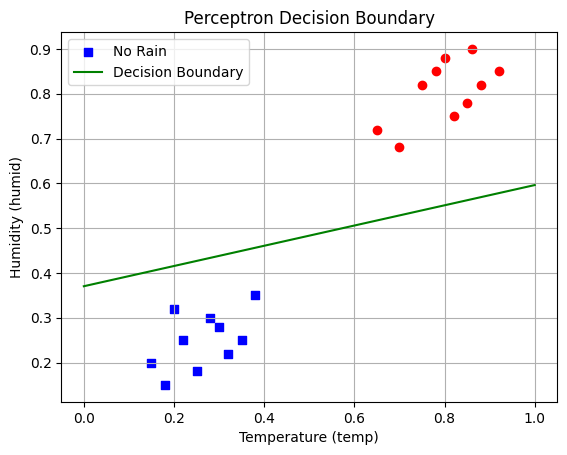

In [5]:
# Replot the data points
for i in range(len(df)):
    if df.iloc[i]['rain'] == 0:
        plt.scatter(df.iloc[i]['temp'], df.iloc[i]['humid'], color='blue', marker='s', label='No Rain' if i == 0 else "")
    else:
        plt.scatter(df.iloc[i]['temp'], df.iloc[i]['humid'], color='red', marker='o', label='Rain' if i == 0 else "")

# Plot decision boundary: w1*x + w2*y + b = 0 → y = (-w1*x - b)/w2
x_vals = np.linspace(0, 1, 100)
y_vals = -(weights[0] * x_vals + bias) / weights[1]

plt.plot(x_vals, y_vals, color='green', label='Decision Boundary')

plt.xlabel("Temperature (temp)")
plt.ylabel("Humidity (humid)")
plt.title("Perceptron Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()
